Gold Price Prediction using Machine Learning

## IMPORTING ALL THE REQUIRE MODULES

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib.pyplot import figure
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [2]:
# IMPORTING THE DATASET

In [3]:
df = pd.read_csv('FINAL_USO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


# EDA

In [4]:
df.shape

(1718, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [6]:
df.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


# Effect of Index price on Gold Rates

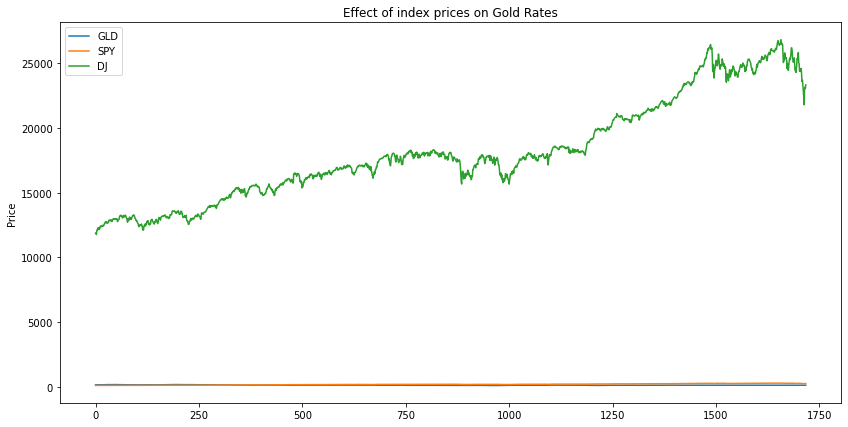

In [8]:
GLD_adj_close = df['Adj Close']
SPY_adj_close = df['SP_Ajclose']
DJ_adj_close =  df['DJ_Ajclose']

df_p = pd.DataFrame({'GLD': GLD_adj_close, 'SPY': SPY_adj_close, 'DJ':DJ_adj_close})

df_ax = df_p.plot(title='Effect of index prices on Gold Rates', figsize=(14,7))
df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')
plt.show()


# Computing Daily Returns of all Features

In [9]:
def compute_daily_returns(df):
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

In [10]:
GLD_adj_close = df['Adj Close']
SPY_adj_close = df['SP_Ajclose']
DJ_adj_close  = df['DJ_Ajclose']
EG_adj_close  = df['EG_Ajclose']
USO_Adj_close = df['USO_Adj Close']
GDX_Adj_close = df['GDX_Adj Close']
EU_price      = df['EU_Price']
OF_price      = df['OF_Price']
OS_price      = df['OS_Price']
SF_price      = df['SF_Price']
USB_price     = df['USB_Price']
PLT_price     = df['PLT_Price']
PLD_price     = df['PLD_Price']
rho_price     = df['RHO_PRICE']
usdi_price    = df['USDI_Price']
                   

GLD_daily_return = compute_daily_returns(GLD_adj_close)
SPY_daily_return = compute_daily_returns(SPY_adj_close)
DJ_adj_return    = compute_daily_returns(DJ_adj_close)
EG_adj_return    = compute_daily_returns(EG_adj_close)
USO_Adj_return   = compute_daily_returns(USO_Adj_close)
GDX_Adj_return   = compute_daily_returns(GDX_Adj_close)
EU_return        = compute_daily_returns(EU_price)
OF_price         = compute_daily_returns(OF_price)
OS_price         = compute_daily_returns(OS_price)
SF_price         = compute_daily_returns(SF_price)
USB_price        = compute_daily_returns(USB_price)
PLT_price        = compute_daily_returns(PLT_price)
PLD_price        = compute_daily_returns(PLD_price)
rho_price        = compute_daily_returns(rho_price)
USDI_price       = compute_daily_returns(usdi_price)
                                         
                                         


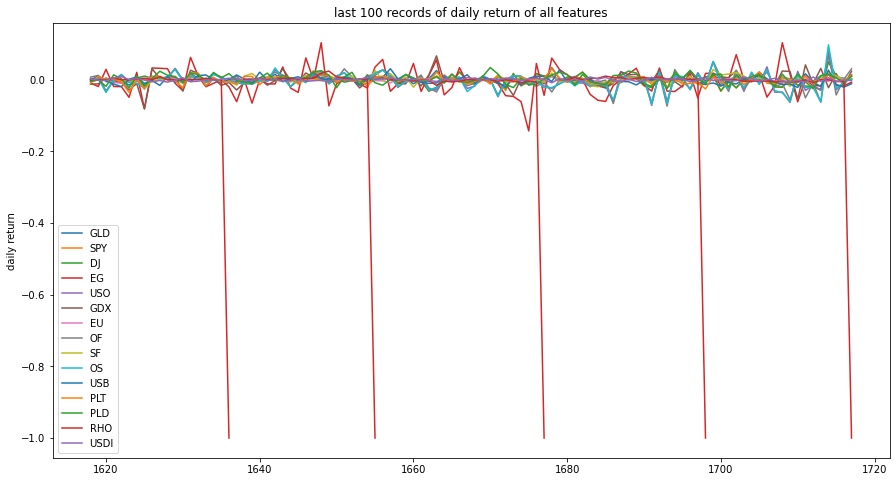

In [11]:
df_d = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return, 'EG':EG_adj_return,
                     'USO':USO_Adj_return,
                  'GDX':GDX_Adj_return,'EU':EU_return, 'OF':OF_price,'SF':SF_price,'OS':OS_price,
                     'USB':USB_price, 'PLT':PLT_price, 'PLD':PLD_price,
                  'RHO':rho_price,'USDI':USDI_price})

daily_ax = df_d[-100:].plot(title='last 100 records of daily return of all features',figsize=(15,8))
daily_ax.set_ylabel("daily return")
daily_ax.legend(loc='lower left')
plt.show()                                         
                                         
                                    

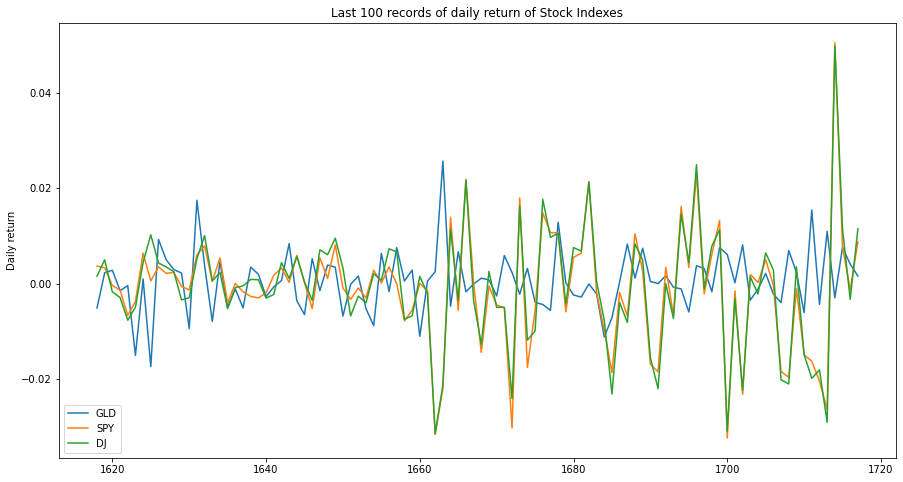

In [12]:
df_s = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return})

daily_ax = df_s[-100:].plot(title='Last 100 records of daily return of Stock Indexes',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

# Scatter plot with the features find relation

<AxesSubplot:xlabel='SPY', ylabel='GLD'>

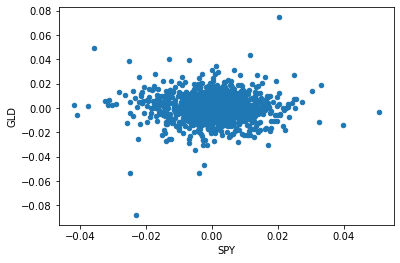

In [13]:
df_d.plot(kind='scatter', x='SPY', y='GLD')

<AxesSubplot:xlabel='DJ', ylabel='GLD'>

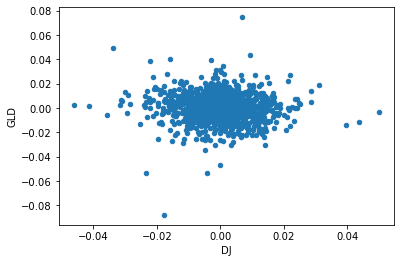

In [14]:
df_d.plot(kind='scatter', x='DJ', y='GLD')

<AxesSubplot:xlabel='EG', ylabel='GLD'>

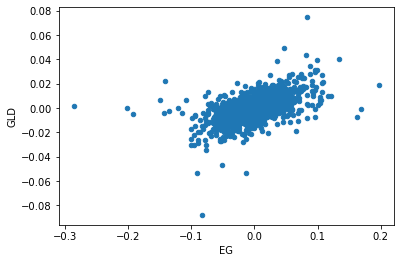

In [15]:
df_d.plot(kind='scatter', x='EG', y='GLD')

<AxesSubplot:xlabel='USO', ylabel='GLD'>

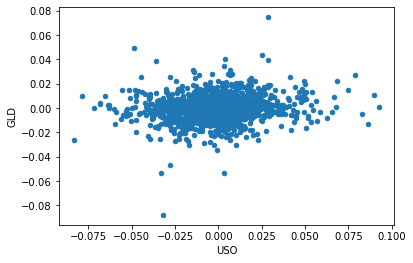

In [16]:
df_d.plot(kind='scatter', x='USO', y='GLD')

<AxesSubplot:xlabel='USB', ylabel='GLD'>

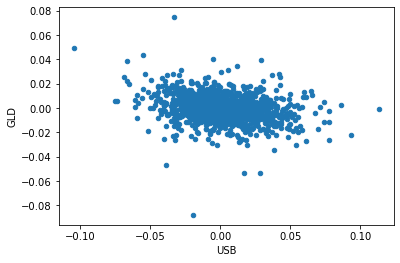

In [17]:
df_d.plot(kind='scatter', x='USB', y='GLD')

<AxesSubplot:xlabel='EU', ylabel='GLD'>

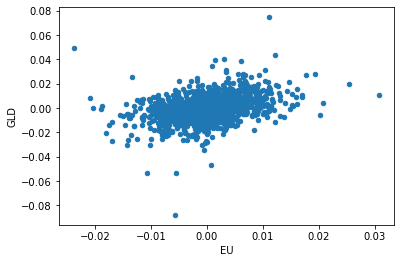

In [18]:
df_d.plot(kind='scatter', x='EU', y='GLD')

<AxesSubplot:xlabel='PLT', ylabel='GLD'>

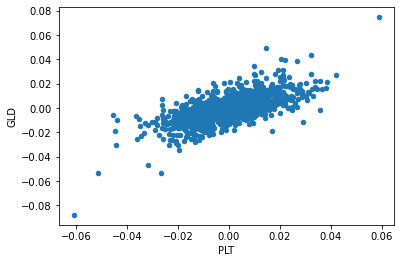

In [19]:
df_d.plot(kind='scatter', x='PLT', y='GLD')

<AxesSubplot:xlabel='PLD', ylabel='GLD'>

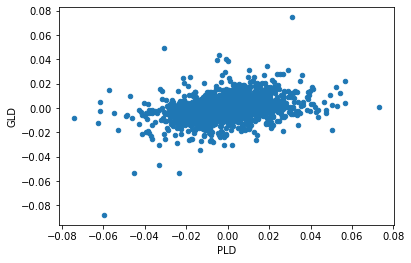

In [20]:
df_d.plot(kind='scatter', x='PLD', y='GLD')

<AxesSubplot:>

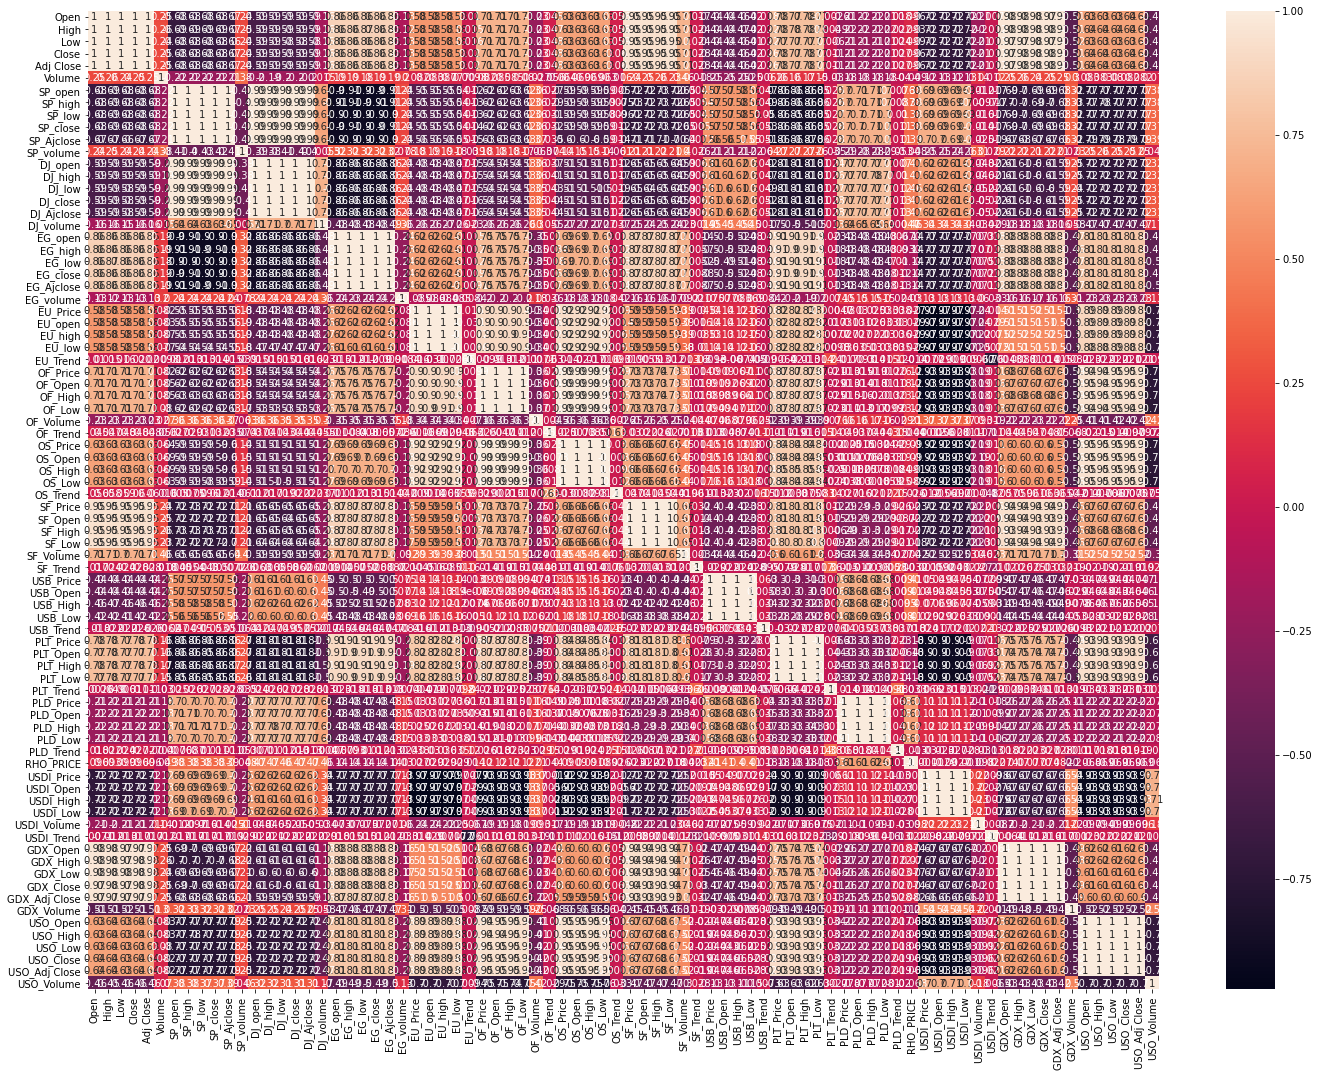

In [21]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df.corr(), annot=True) 

dividing in x and y value i.e features values and target value

In [22]:
x = df.drop("Adj Close" , axis=1)
y = df["Adj Close"]

<AxesSubplot:title={'center':'Correlation with Adj Close'}>

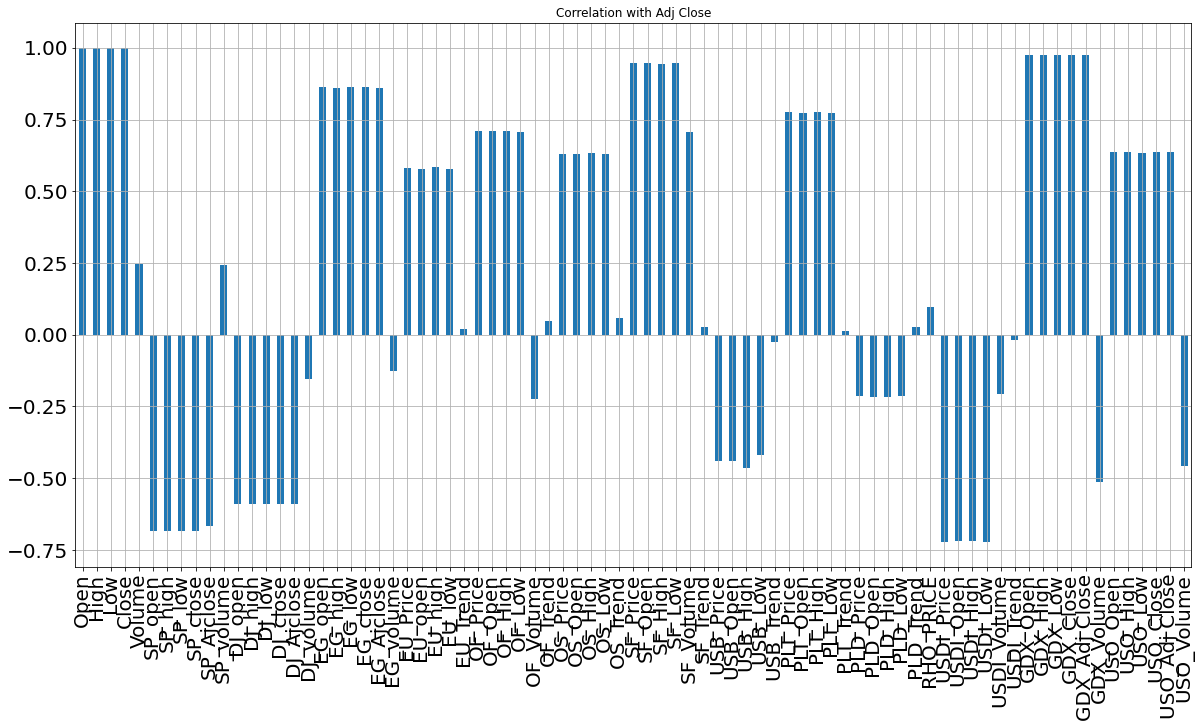

In [23]:
x.corrwith(df['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [24]:
corr_matrix=df.corr()
coef=corr_matrix["Adj Close"].sort_values(ascending=False)

In [25]:
coef

Close         1.000000
Adj Close     1.000000
High          0.999535
Low           0.999532
Open          0.998976
                ...   
SP_high      -0.684904
USDI_High    -0.720023
USDI_Open    -0.720140
USDI_Price   -0.721569
USDI_Low     -0.722078
Name: Adj Close, Length: 80, dtype: float64

Technical Indicators
feature for prediction of Gold price

1. MACD : The moving average convergence-divergence (MACD) is one of the most powerful and well-known indicators in technical analysis.
    The indicator is comprised of two exponential moving averages that help measure momentum in a security. 
    The MACD is simply the difference between these two moving averages plotted against a centerline, where the centerline is the 
    point at which the two moving averages are equal.

2. RSI : The relative strength index (RSI) is another well known momentum indicators that’s widely used in technical analysis.
    The indicator is commonly used to identify overbought and oversold conditions in a security with a range between 0 (oversold) 
    and 100 (overbought).

3. Simple Moving Average (SMA) : simply takes the sum of all of the past closing prices over a time period and divides the result 
    by the total number of prices used in the calculation. For example, a 10-day simple moving average takes the last ten closing
    prices and divides them by ten.

4. Upper Band

5. Lower Band

6. DIFF

7. Open-Close

8. High-Low

Calculating Technical indicators

In [26]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    delta = df.diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

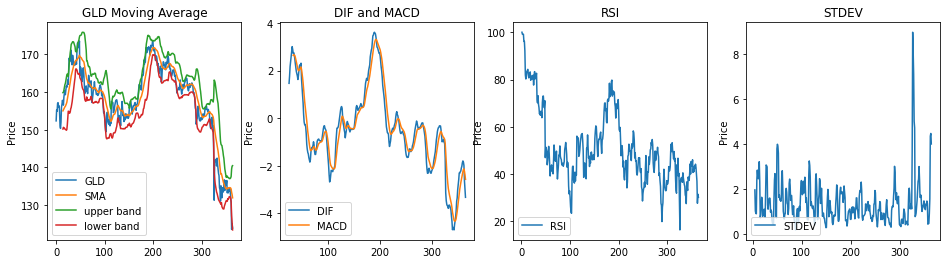

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Calculate Simple Moving Average for GLD
SMA_GLD = calculate_SMA(GLD_adj_close)

GLD_adj_close[:365].plot(title='GLD Moving Average',label='GLD', ax=axes[0])

SMA_GLD[:365].plot(label="SMA",ax=axes[0])


# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(GLD_adj_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])


# Calculate MACD for GLD
DIF, MACD = calculate_MACD(GLD_adj_close)

DIF[:365].plot(title='DIF and MACD',label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI for GLD
RSI = calculate_RSI(GLD_adj_close)
RSI[:365].plot(title='RSI',label='RSI', ax=axes[2])

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(GLD_adj_close)
STDEV[:365].plot(title='STDEV',label='STDEV', ax=axes[3])

Open_Close=df.Open - df.Close

High_Low=df.High-df.Low

axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[3].set_ylabel('Price')



axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[2].legend(loc='lower left')
axes[3].legend(loc='lower left')

In [28]:
test = df
test['SMA'] = SMA_GLD
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['DIF'] = DIF
test['MACD'] = MACD
test['RSI'] = RSI
test['STDEV'] = STDEV
test['Open_Close']=Open_Close
test['High_Low']=High_Low


# Dropping first 33 records from the data as it has null values because of introduction of technical indicators
test = test[33:]

# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])


display(test.head())

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
33,2012-02-06,166.960007,167.679993,166.610001,167.179993,167.179993,8807400,133.979996,134.509995,133.830002,...,6126100,165.198666,173.018365,157.378968,2.724443,2.641891,70.144545,1.562107,-0.219986,1.069992
34,2012-02-07,167.380005,170.089996,167.149994,169.699997,169.699997,11614300,134.169998,135.020004,133.639999,...,10237000,165.894667,173.296304,158.493029,2.754381,2.667095,73.152763,1.594111,-2.319992,2.940002
35,2012-02-08,169.259995,169.960007,167.500000,168.500000,168.500000,10655500,134.860001,135.220001,134.309998,...,9045800,166.428000,173.297467,159.558533,2.655845,2.664634,69.576023,1.575718,0.759995,2.460007
36,2012-02-09,170.009995,170.369995,167.669998,168.020004,168.020004,16085200,135.410004,135.589996,134.559998,...,4663500,166.856000,173.217507,160.494493,2.511947,2.631843,68.148015,0.965153,1.989991,2.699997
37,2012-02-10,166.490005,167.639999,166.330002,167.139999,167.139999,10326800,134.160004,134.470001,133.839996,...,6008600,167.250666,172.795817,161.705515,2.303734,2.562404,65.507009,1.059963,-0.649994,1.309997


In [29]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [30]:
feature_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume',
       'SMA', 'Upper_band', 'Lower_band', 'DIF', 'MACD', 'RSI', 'STDEV',
       'Open_Close', 'High_Low']


# Scaling or normalization of feature variable using MinMaxScaler

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
33,0.913669,0.912561,0.913193,0.912050,0.912050,0.079151,0.037098,0.034927,0.040627,0.038373,...,0.046608,0.906189,0.961240,0.821988,0.893394,0.911893,0.807275,0.167603,0.415010,0.091684
34,0.919480,0.945539,0.920622,0.946519,0.946519,0.109560,0.038247,0.038015,0.039473,0.040428,...,0.084243,0.916193,0.965092,0.837893,0.896986,0.915193,0.852413,0.171198,0.280308,0.291045
35,0.945490,0.943760,0.925437,0.930105,0.930105,0.099173,0.042423,0.039225,0.043542,0.042845,...,0.073338,0.923859,0.965108,0.853105,0.885164,0.914871,0.798744,0.169132,0.477870,0.239873
36,0.955866,0.949370,0.927775,0.923540,0.923540,0.157998,0.045752,0.041465,0.045060,0.043872,...,0.033218,0.930011,0.964000,0.866467,0.867900,0.910578,0.777317,0.100533,0.556766,0.265458
37,0.907167,0.912014,0.909341,0.911503,0.911503,0.095612,0.038187,0.034685,0.040687,0.037829,...,0.045532,0.935684,0.958155,0.883757,0.842920,0.901486,0.737688,0.111185,0.387428,0.117271


In [32]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_x = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_x.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
33,0.913669,0.912561,0.913193,0.912050,0.912050,0.079151,0.037098,0.034927,0.040627,0.038373,...,0.046608,0.906189,0.961240,0.821988,0.893394,0.911893,0.807275,0.167603,0.415010,0.091684
34,0.919480,0.945539,0.920622,0.946519,0.946519,0.109560,0.038247,0.038015,0.039473,0.040428,...,0.084243,0.916193,0.965092,0.837893,0.896986,0.915193,0.852413,0.171198,0.280308,0.291045
35,0.945490,0.943760,0.925437,0.930105,0.930105,0.099173,0.042423,0.039225,0.043542,0.042845,...,0.073338,0.923859,0.965108,0.853105,0.885164,0.914871,0.798744,0.169132,0.477870,0.239873
36,0.955866,0.949370,0.927775,0.923540,0.923540,0.157998,0.045752,0.041465,0.045060,0.043872,...,0.033218,0.930011,0.964000,0.866467,0.867900,0.910578,0.777317,0.100533,0.556766,0.265458
37,0.907167,0.912014,0.909341,0.911503,0.911503,0.095612,0.038187,0.034685,0.040687,0.037829,...,0.045532,0.935684,0.958155,0.883757,0.842920,0.901486,0.737688,0.111185,0.387428,0.117271


Shape of features :  (1685, 89)
Shape of target :  (1685, 1)


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
1712,0.252767,0.249863,0.252304,0.249214,0.249214,0.131396,0.719499,0.732264,0.685249,0.680445,...,0.346662,0.221370,0.217009,0.228105,0.658641,0.648503,0.687759,0.071990,0.459268,0.050107
1713,0.258024,0.262042,0.266061,0.266995,0.266995,0.089215,0.672900,0.678571,0.650574,0.642011,...,0.188254,0.225663,0.221905,0.231591,0.673309,0.655308,0.771343,0.103731,0.400256,0.038380
1714,0.272551,0.273810,0.266061,0.262071,0.262071,0.138587,0.654321,0.710896,0.647477,0.713561,...,0.365682,0.228778,0.225424,0.234153,0.680140,0.662243,0.728779,0.105509,0.490699,0.130064
1715,0.271859,0.272441,0.273903,0.274518,0.274518,0.112378,0.694263,0.723668,0.679055,0.724982,...,0.325400,0.232083,0.233069,0.232846,0.692906,0.670576,0.782400,0.071859,0.429121,0.058636
1716,0.275042,0.274904,0.281882,0.281220,0.281220,0.058103,0.736686,0.742494,0.724540,0.723048,...,0.199288,0.235840,0.241125,0.232010,0.706157,0.680136,0.808642,0.092629,0.412444,0.015992


,Adj Close
1712,120.019997
1713,119.660004
1714,120.570000
1715,121.059998
1716,121.250000



 -----After process------ 

Shape of features :  (1595, 89)
Shape of target :  (1595, 1)


,Adj Close
1623,113.070000
1624,111.099998
1625,112.129997
1626,112.690002
1627,113.019997


# Time Series Split

In [33]:
ts_split = TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        xtrain, xtest = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        ytrain, ytest = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [34]:
def validate_result(model, model_name):
    predicted = model.predict(validation_x)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

# creating machine learning module

RMSE:  1.1191216278786156
R2 score:  0.7115270677034191


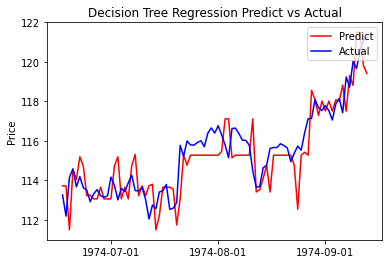

In [35]:
dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(xtrain, ytrain)

validate_result(benchmark_dt, 'Decision Tree Regression')

RMSE:  0.7797133287018139
R2 score:  0.8599702195550628


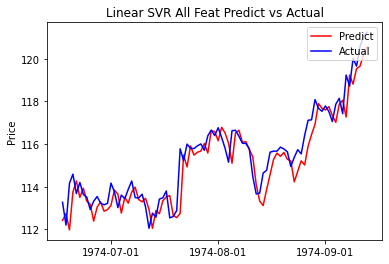

In [36]:
solution_models={}
svr_lin = SVR(kernel='linear') # SVR with  linear Kernel

linear_svr = svr_lin.fit(xtrain,ytrain)
98*6666
validate_result(linear_svr,'Linear SVR All Feat')

In case of SVR we are getting more accuracy as compare to Decision Tree, now we wil find best parameter for GridSearchCV

RMSE:  0.7797133287018139
R2 score:  0.8599702195550628


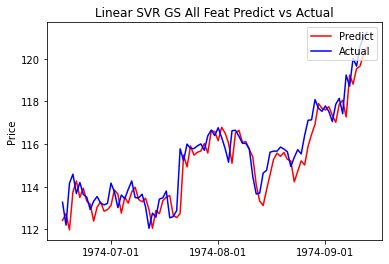

In [37]:
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator = linear_svr,
                           param_grid = linear_svr_parameters,
                           cv=ts_split,
)

linear_svr.fit(xtrain, ytrain)

validate_result(linear_svr,'Linear SVR GS All Feat')

RMSE:  0.810468678593767
R2 score:  0.848705561871506


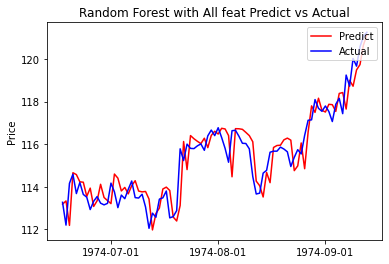

In [38]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest = rf_cl.fit(xtrain,ytrain)
validate_result(random_forest,'Random Forest with All feat')

# Hyper Parameter Tuning

In [39]:
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

grid_search_RF_feat = GridSearchCV(estimator=random_forest,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)

grid_search_RF_feat.fit(xtrain, ytrain)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(n_estimators=50, random_state=0),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 15, 20, 50, 100]})

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 20}
RMSE:  0.8485991542860846
R2 score:  0.8341346457671392


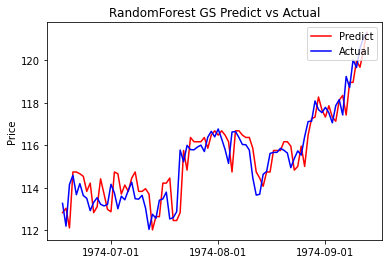

In [40]:
print(grid_search_RF_feat.best_params_)
validate_result(grid_search_RF_feat,'RandomForest GS')

here we can see default parameters are giving better r2_score

RMSE:  0.7019383090368421
R2 score:  0.8865124078815144


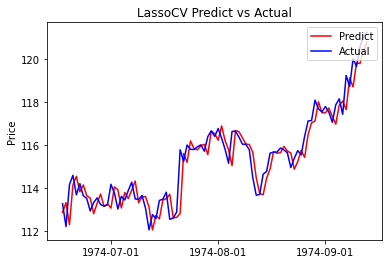

RMSE:  0.7134865154007511
R2 score:  0.8827475218365675


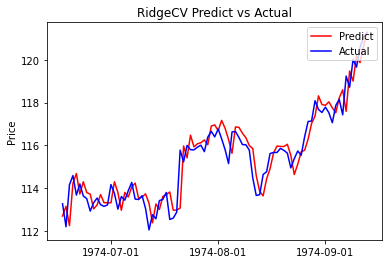

In [41]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

lasso_clf_feat = lasso_clf.fit(xtrain,ytrain)
validate_result(lasso_clf_feat,'LassoCV')
solution_models['LassoCV All feat'] = lasso_clf_feat

ridge_clf_feat = ridge_clf.fit(xtrain,ytrain)
validate_result(ridge_clf_feat,'RidgeCV')
solution_models['RidgeCV All Feat'] = ridge_clf_feat